## ANALYZING THE FACTORS THAT HAVE INFLUENCED THE PRICES OF CRYPTOCURRENCIES OVER THE YEARS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import functions as f

## Hypotheses

*  Social Media opinions can positively or negatively impact the price of cryptocurrencies based on the sentiment.
*  Low Unemployment rates can lead to increase in Cryptocurrency prices, and vice versa
*  The Federal Interest rates have a strong influence over Cryptocurrency prices
*  Rise in inflation can cause the prices of Cryptocurrencies to decrease
*  Cryptocurrency prices can change depending on the trends of the US Dollar    


## Twitter Sentiment

In [91]:
bitcoin = f.crypto_dataset('./cryptodata/bitcoin_2013-01-01_2024-04-22.csv')
ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
doge = f.crypto_dataset('./cryptodata/dogecoin_2016-01-01_2024-04-22.csv')

In [36]:
tweets = pd.read_csv("btc_selected_with_sentiment_2023_01_02_2023_06_12.csv")

In [89]:
tweets

,Unnamed: 0,date,close,high,low,open,volume,adjclose,changes,compound,sentiment_type
0,1,2023-01-02,16759,16572,16626,16688,12097775227,16688,positive,0.3818,POSITIVE
1,2,2023-01-03,16760,16622,16689,16680,13903079207,16680,positive,0.0000,NEUTRAL
2,3,2023-01-04,16965,16668,16680,16863,18421743322,16863,positive,0.6369,POSITIVE
3,4,2023-01-05,16884,16790,16863,16837,13692758566,16837,negative,0.4657,POSITIVE
4,5,2023-01-06,16992,16716,16836,16952,14413662913,16952,positive,0.8256,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
157,158,2023-06-08,26798,26247,26348,26508,11904824295,26508,negative,0.7859,POSITIVE
158,159,2023-06-09,26770,26339,26506,26480,11015551640,26480,negative,0.9168,POSITIVE
159,160,2023-06-10,26531,25502,26482,25851,19872933189,25851,negative,0.7643,POSITIVE
160,161,2023-06-11,26203,25669,25854,25940,10732609603,25940,negative,0.9059,POSITIVE


*  Dataset used in the analysis is taken from an ongoing research on the same topic.
*  Dataset contains filtered tweets from more than 50 Cryptocurrency Influencers, from Jan 2023 to June 2023.
*  Sentiment has been selected based on the ‘importance_coefficient’ , which was calculated using parameters of
   number of likes, retweets, comments, followers. 

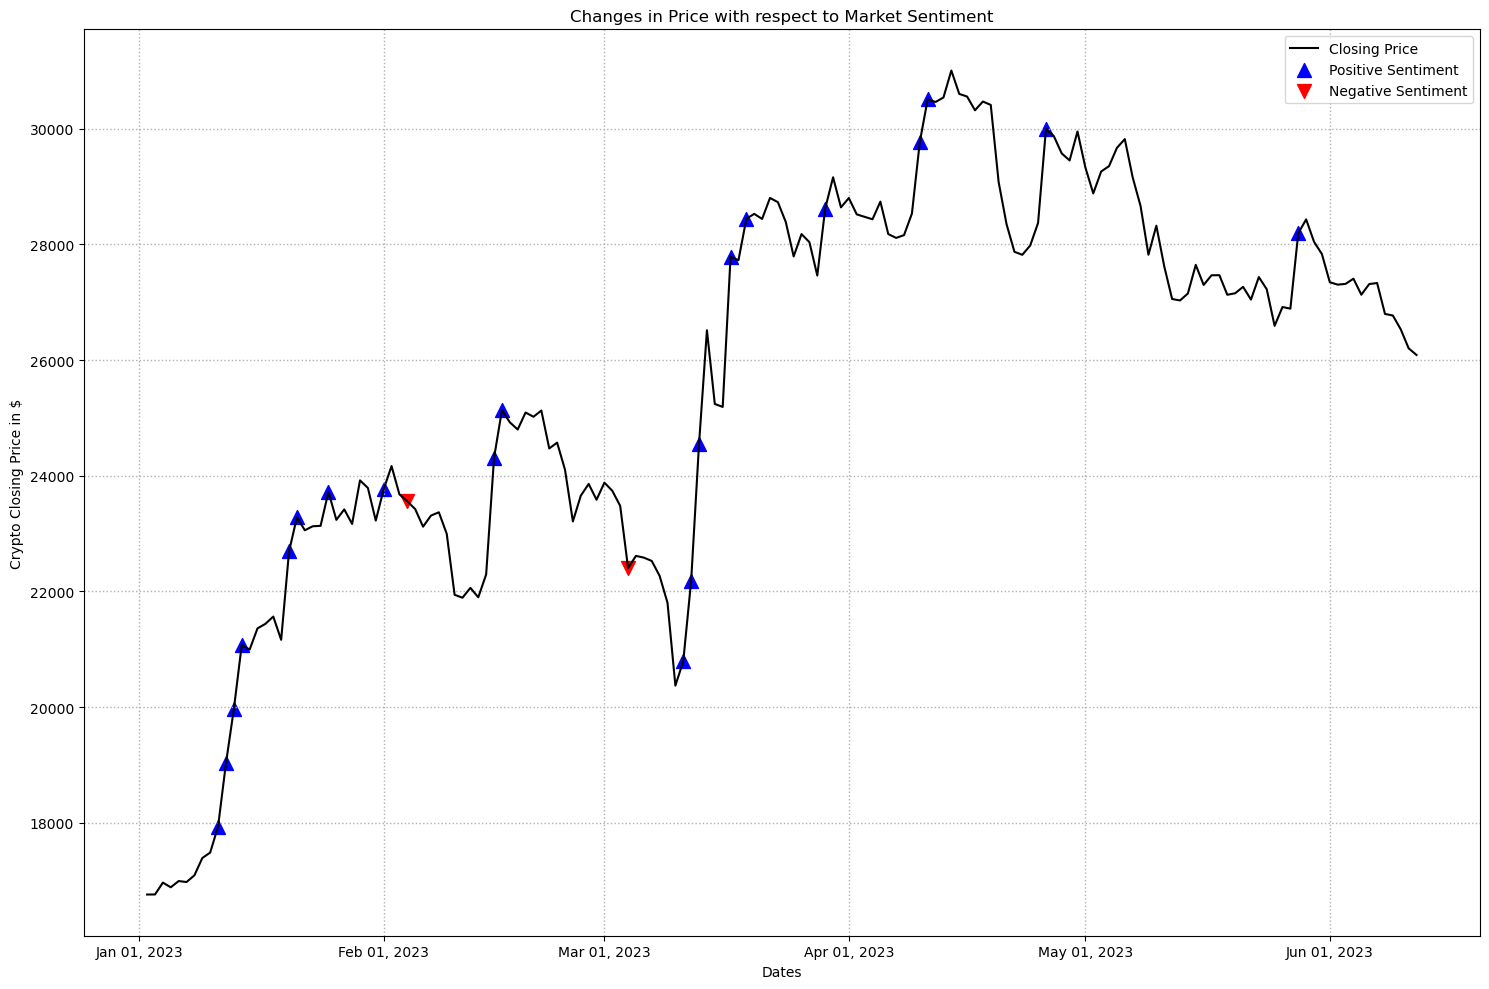

In [37]:
f.crypto_sentiment("./TwitterData/btc_selected_with_sentiment_2023_01_02_2023_06_12.csv")

While not a perfect correlation, there seem to be instances where positive
sentiment aligns with price increases and negative sentiment coincides
with price drops. This suggests that market sentiment, as captured by the
indicators, can play a role in influencing short-term price movements.

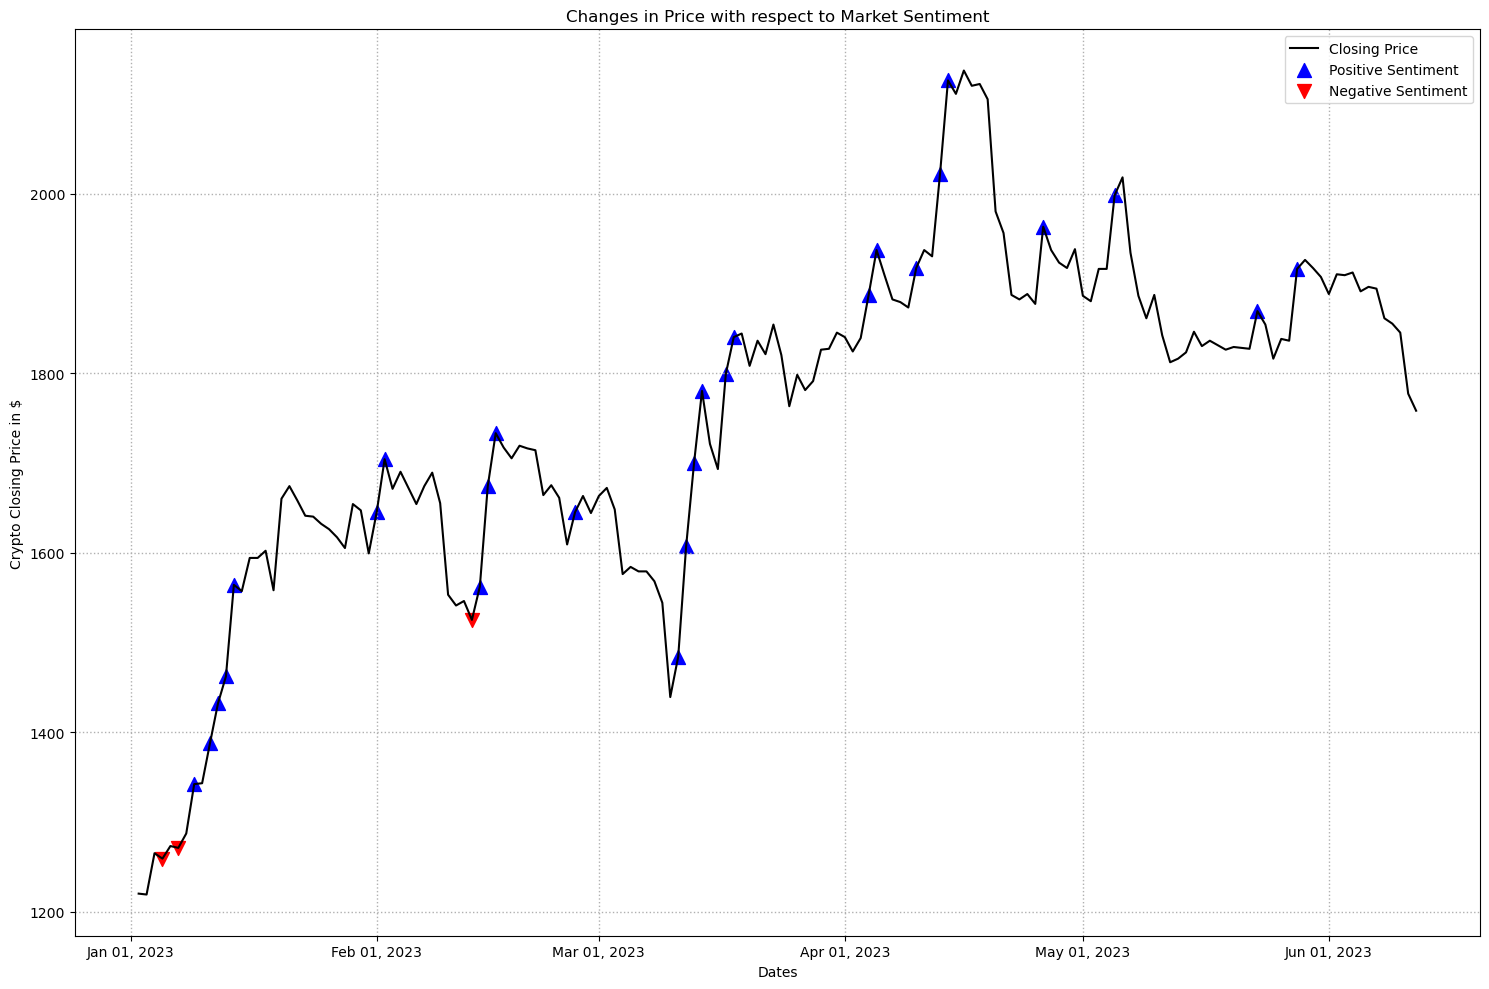

In [38]:
f.crypto_sentiment("./TwitterData/eth_selected_with_sentiment_2023_01_02_2023_06_12.csv")

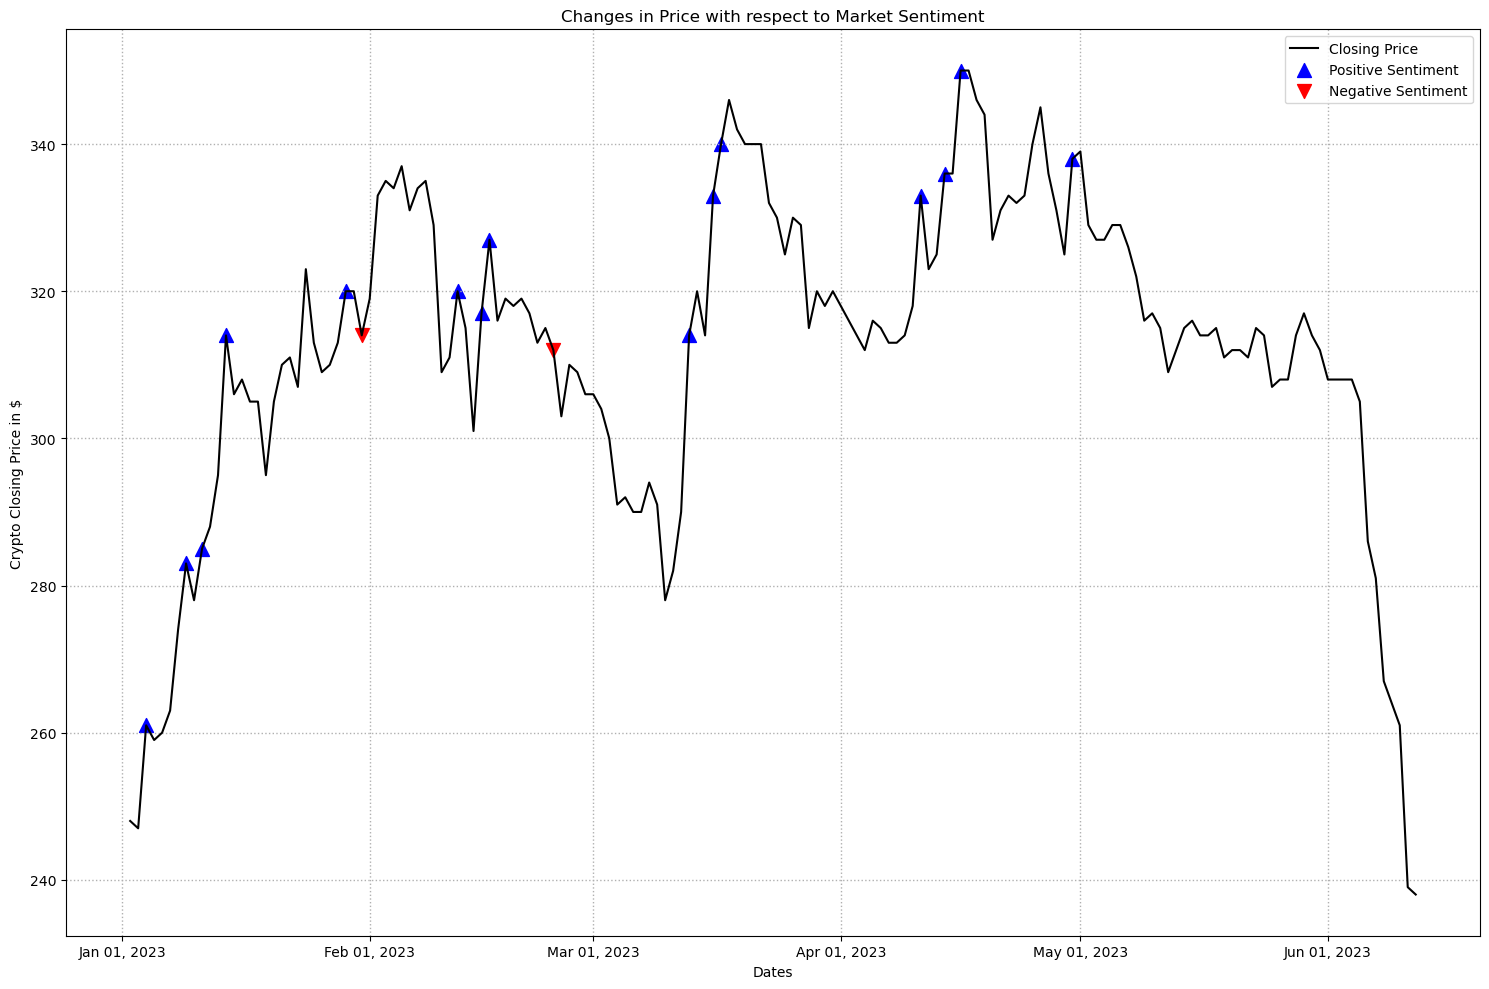

In [39]:
f.crypto_sentiment("./TwitterData/bnb_selected_with_sentiment_2023_01_02_2023_06_12.csv")


*  More Data is needed to support the hypothesis that Social Media Sentiment plays a role in driving Cryptocurrency Prices
* Although, there have been some instances where the increase in prices of Bitcoin and Ethereum aligned with the overall positive sentiment on Twitter
* Cryptocurrencies are highly volatile, and the sentiments, not just from Twitter but from other social media platforms and news play an important role in determining the price of Cryptocurrencies.




## Unemployment

*  Talking about the second hypothesis, one can hypothesize that low unemployment rates generally indicate a healthy
   economy with higher income among individuals, can lead to an increase in cryptocurrency investments
*  During COVID, unemployment rates skyrocketed around the world, which also had an impact on Cryptocurrency prices

In [40]:
unemployment_usa = f.unemployment_data("./EconomicFactors/monthly_unemployment_data.csv", period_one = '2023-01-01', period_two = '2023-12-31')
unemployment_usa
unemployment_usa = unemployment_usa.rename(columns = {"TIME_PERIOD":"Date"})
unemployment_usa['Date'] = pd.to_datetime(unemployment_usa['Date'])

In [90]:
merged_data_btc = pd.merge(unemployment_usa, bitcoin, left_on='Date', right_on='Date', how='inner')
merged_data_btc

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,Open,High,Low,Close,Volume,Market Cap
0,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,38465.162375,39210.262027,38103.138300,38761.968300,5.606411e+10,7.303744e+11
1,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,43182.005400,44788.074900,42934.442600,44359.871200,9.293590e+10,8.277103e+11
2,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,45520.196841,46608.675179,44376.979328,46231.004759,8.242863e+10,8.649123e+11
3,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,37636.021418,38615.598700,37572.229800,38467.094000,4.969523e+10,7.238431e+11
4,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,31779.999554,31945.459415,29490.850881,29789.421134,6.409998e+10,5.921422e+11
5,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,19922.819048,20623.152262,19075.463200,19336.104441,6.361885e+10,3.730991e+11
6,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,23311.555600,23475.594300,22864.676619,23311.592835,6.336285e+10,4.436864e+11
7,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,20053.474000,20185.997600,19619.654900,20145.588400,5.997624e+10,3.822196e+11
8,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,19424.060072,19470.252372,19221.463000,19305.171900,6.865369e+10,3.703810e+11
9,DATAFLOW,OECD.SDD.TPS:DSD_LFS@DF_IALFS_INDIC(1.0),Infra-annual labour statistics,I,USA,United States,UNE_LF_M,Monthly unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0,Units,1,One,20495.705989,20650.438719,20374.129531,20481.554900,7.508634e+10,3.929801e+11


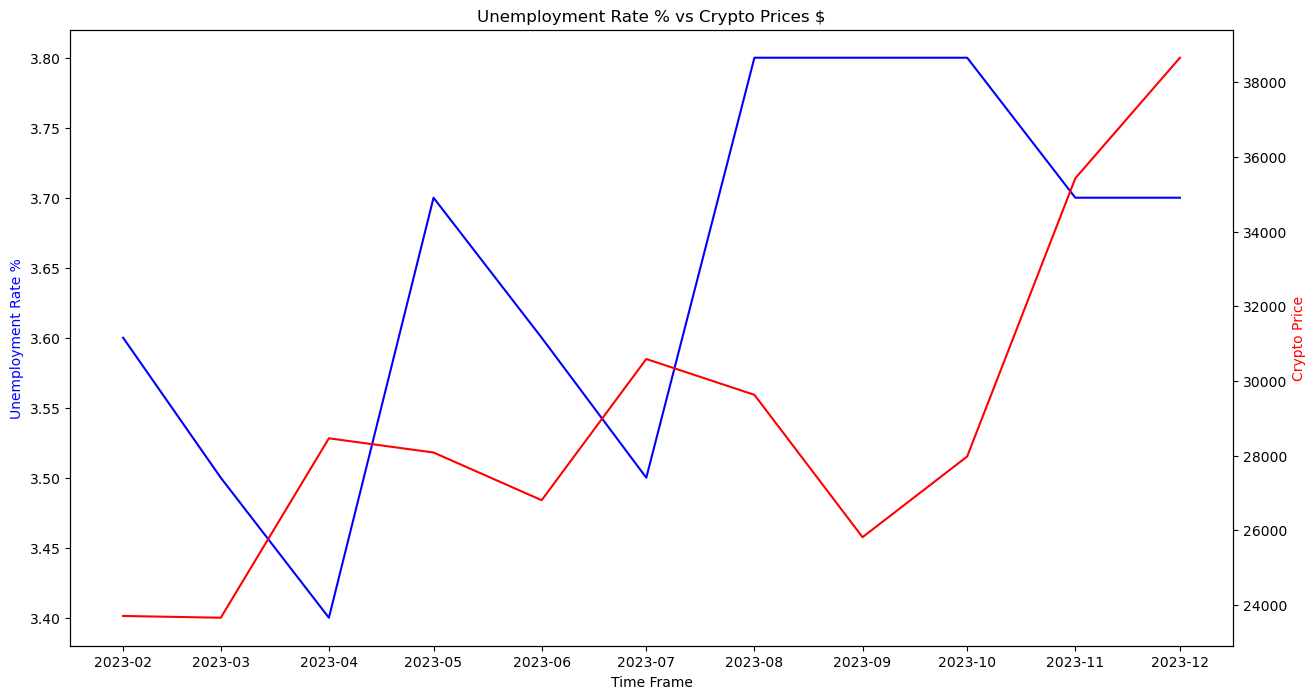

In [42]:
f.plot_unemployment_trends(merged_data_btc)

In [43]:
def merge_unemployment_data(unemployment,crypto):
    
    unemployment_data = unemployment
    crypto_data = crypto
    
    merged_data_crypto = pd.merge(unemployment_data, crypto_data, left_on='Date', right_on='Date', how='inner')
    
    return merged_data_crypto  

In [44]:
ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')

In [45]:
eth_un = merge_unemployment_data(unemployment_usa,ethereum)

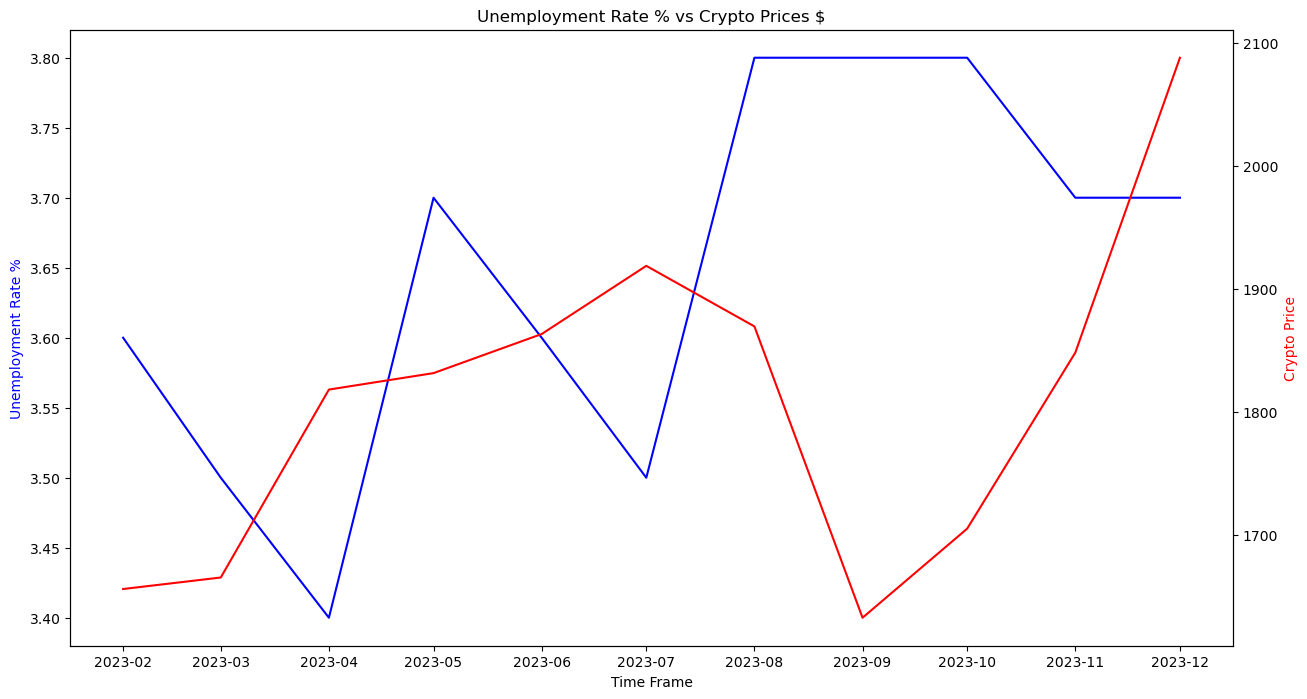

In [46]:
f.plot_unemployment_trends(eth_un)

In [47]:
unemployment_usa = f.unemployment_data("./EconomicFactors/monthly_unemployment_data.csv", period_one = '2022-01-01', period_two = '2022-12-31')
unemployment_usa
unemployment_usa = unemployment_usa.rename(columns = {"TIME_PERIOD":"Date"})
unemployment_usa['Date'] = pd.to_datetime(unemployment_usa['Date'])

In [48]:
ripple = f.crypto_dataset('./cryptodata/ripple_2016-01-01_2024-04-22.csv')

In [49]:
rip = merge_unemployment_data(unemployment_usa,ripple)

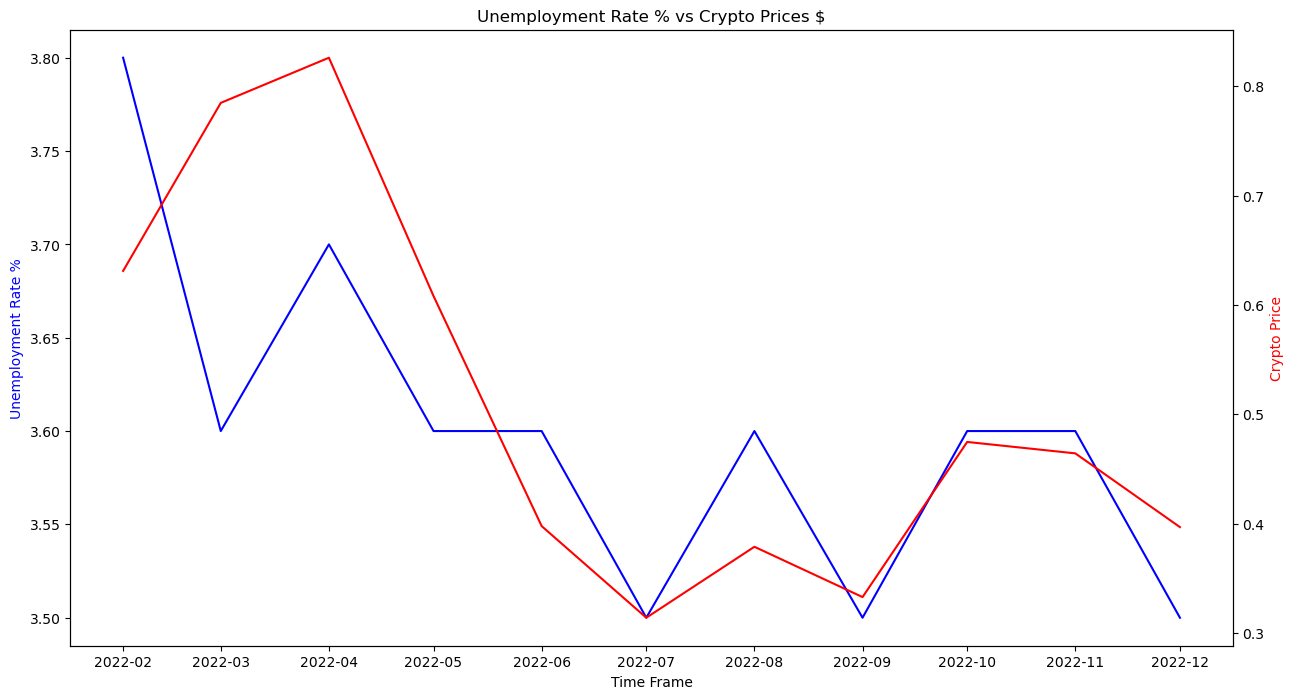

In [50]:
f.plot_unemployment_trends(rip)


*  In the US, government stimulus packages during the pandemic likely played a significant role in boosting asset prices, including cryptocurrencies.
*  Post pandemic, the unemployment rate in the US started to decline, and the crypto prices gradually increased.
*  Although, there's no direct relation, we can see some trends in 2022 and early 2024. But the relationship is not consistent.
*  Thus, there is not enough evidence to prove our hypothesis.

 


## Inflation Rates

In [52]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
4128,2013-01-01,13.3041,13.3041,13.3041,13.3041,0.000000e+00,0.000000e+00
4127,2013-01-02,13.2800,13.2800,13.2800,13.2800,0.000000e+00,0.000000e+00
4126,2013-01-03,13.3979,13.3979,13.3979,13.3979,0.000000e+00,0.000000e+00
4125,2013-01-04,13.5000,13.5000,13.5000,13.5000,0.000000e+00,0.000000e+00
4124,2013-01-05,13.4400,13.4400,13.4400,13.4400,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
4,2024-04-17,63719.7200,64409.6100,60035.0400,61309.9700,1.592861e+11,1.230614e+12
3,2024-04-18,61386.4400,64049.9100,60896.0000,63418.0000,1.622083e+11,1.228285e+12
2,2024-04-19,63286.0000,65384.6000,59734.4200,63965.9500,1.796266e+11,1.254719e+12
1,2024-04-20,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12


In [53]:
inflation_btc = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', bitcoin)

In [54]:
inflation_btc

,date,Inflation Rate (%),Annual Change,,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-12-31,1.4439,-0.91,NaN,2015-12-31,426.620000,432.921000,418.735000,430.538000,4.341306e+07,6.390443e+09
1,2016-12-31,1.6055,0.16,NaN,2016-12-31,961.238000,963.599000,947.236000,963.599000,1.335818e+08,1.534369e+10
2,2017-12-31,2.2543,0.65,NaN,2017-12-31,12596.018572,14298.865845,12395.289475,14033.567993,1.181868e+10,2.296027e+11
3,2018-12-31,2.4504,0.20,NaN,2018-12-31,3863.966826,3865.309440,3727.103167,3746.123953,3.648742e+09,6.640670e+10
4,2019-12-31,2.2061,-0.24,NaN,2019-12-31,7245.200685,7300.392728,7155.958221,7202.624251,1.923169e+10,1.306356e+11
5,2020-12-31,1.9369,-0.27,NaN,2020-12-31,28863.191666,29272.578049,27986.652153,28977.961818,7.927135e+10,5.363150e+11
6,2021-12-31,3.4669,1.53,NaN,2021-12-31,47139.359000,48505.999700,45712.566592,46304.949594,7.810027e+10,8.945653e+11
7,2022-12-31,7.9676,4.50,NaN,2022-12-31,16608.070868,16632.899700,16495.873732,16538.347900,3.406534e+10,3.183907e+11


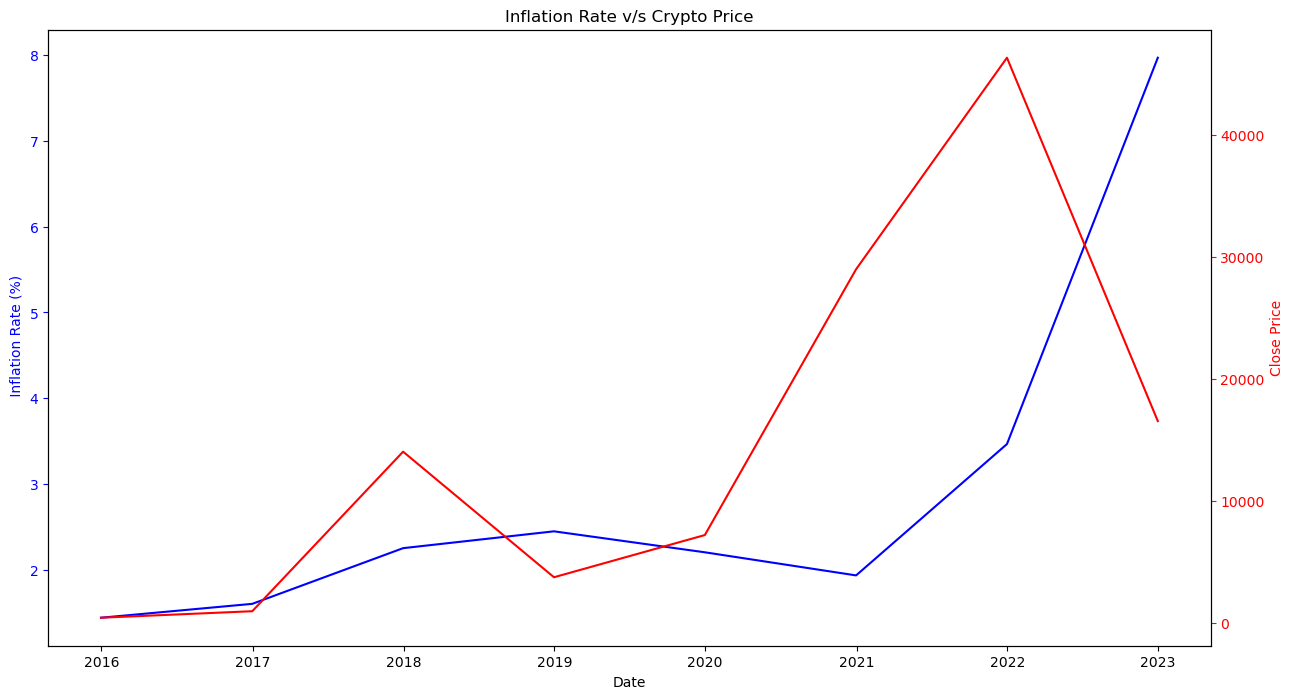

In [55]:
f.plot_inflation_trends(inflation_btc)

In [56]:
inflation_eth = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', ethereum)

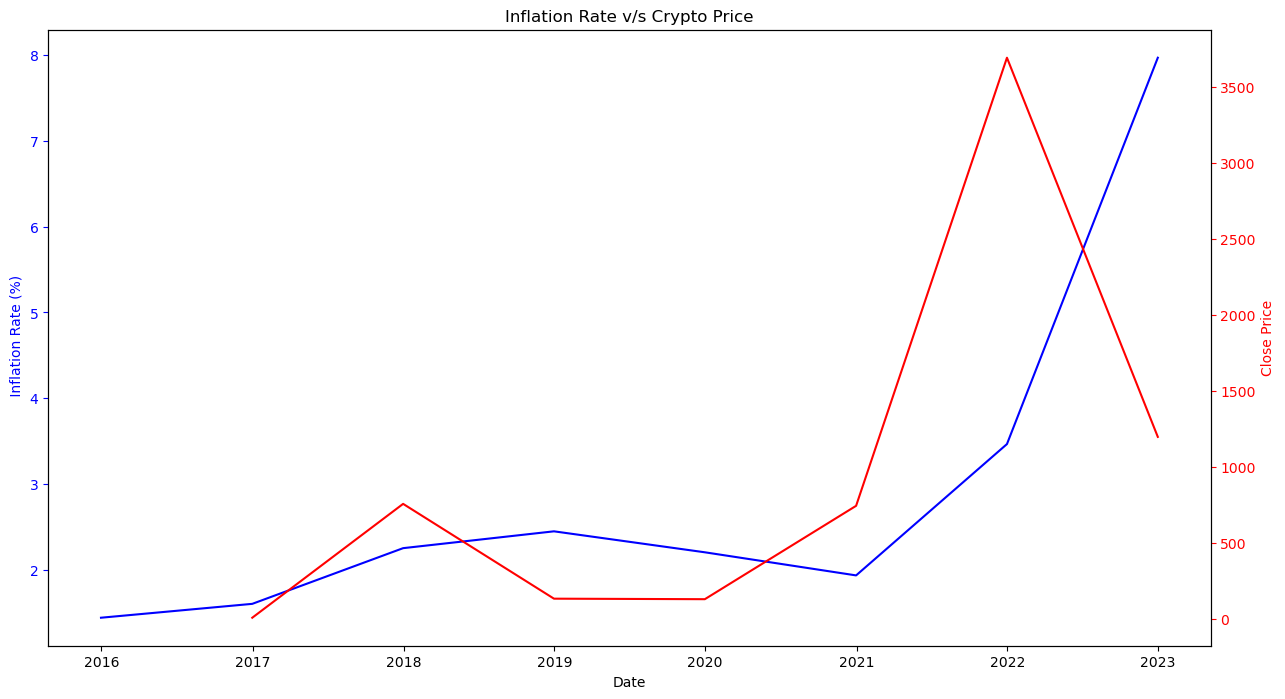

In [57]:
f.plot_inflation_trends(inflation_eth)

In [58]:
usdt = f.crypto_dataset('./cryptodata/tether_2015-01-01_2024-04-22.csv')

In [59]:
inflation_usdt = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', usdt)

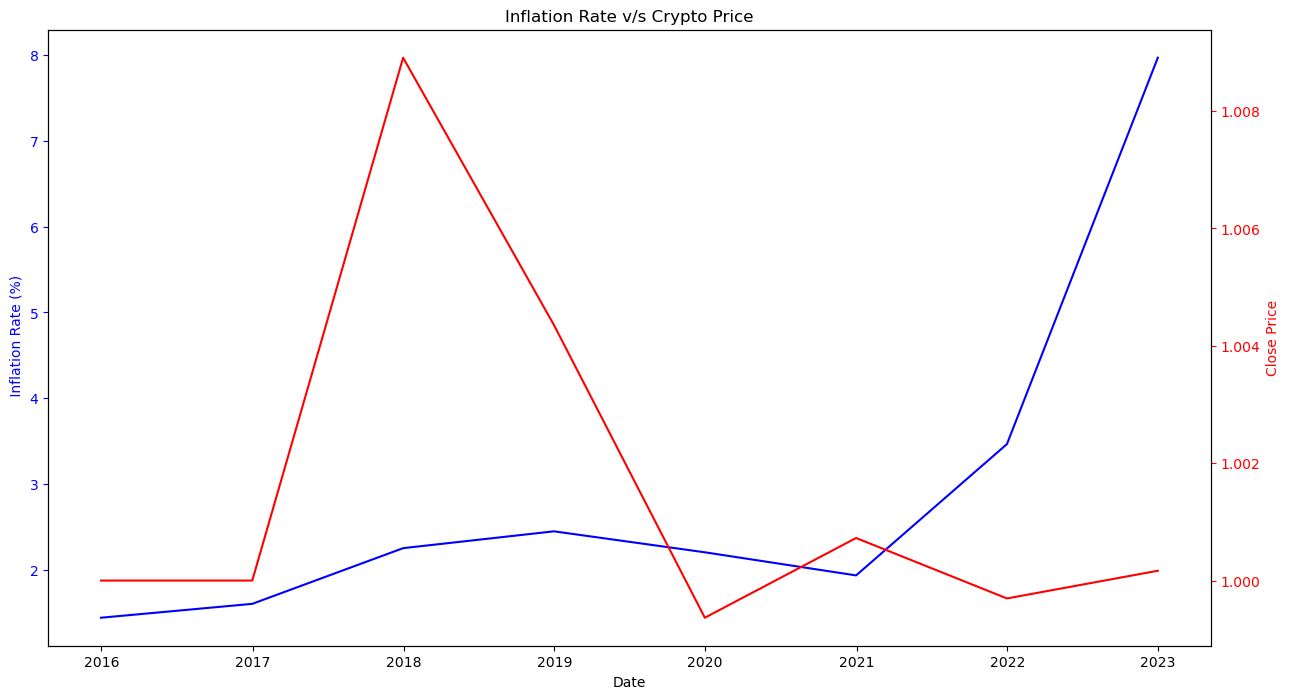

In [60]:
f.plot_inflation_trends(inflation_usdt)

In [61]:
inflation_rip = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', ripple)

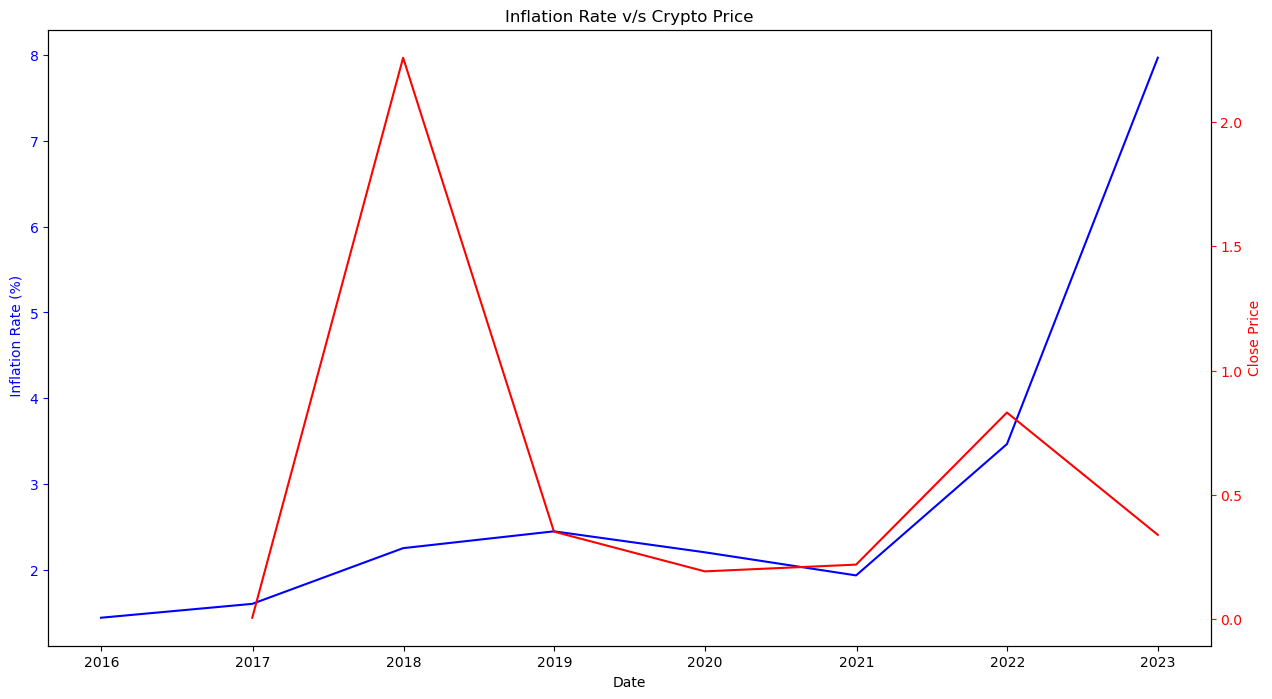

In [62]:
f.plot_inflation_trends(inflation_rip)

In [63]:
binance = f.crypto_dataset('./cryptodata/binance-coin_2017-08-16_2024-04-22.csv')

In [64]:
inflation_bnb = f.combine_inflation_crypto('world-inflation-rate-cpi.csv', binance)

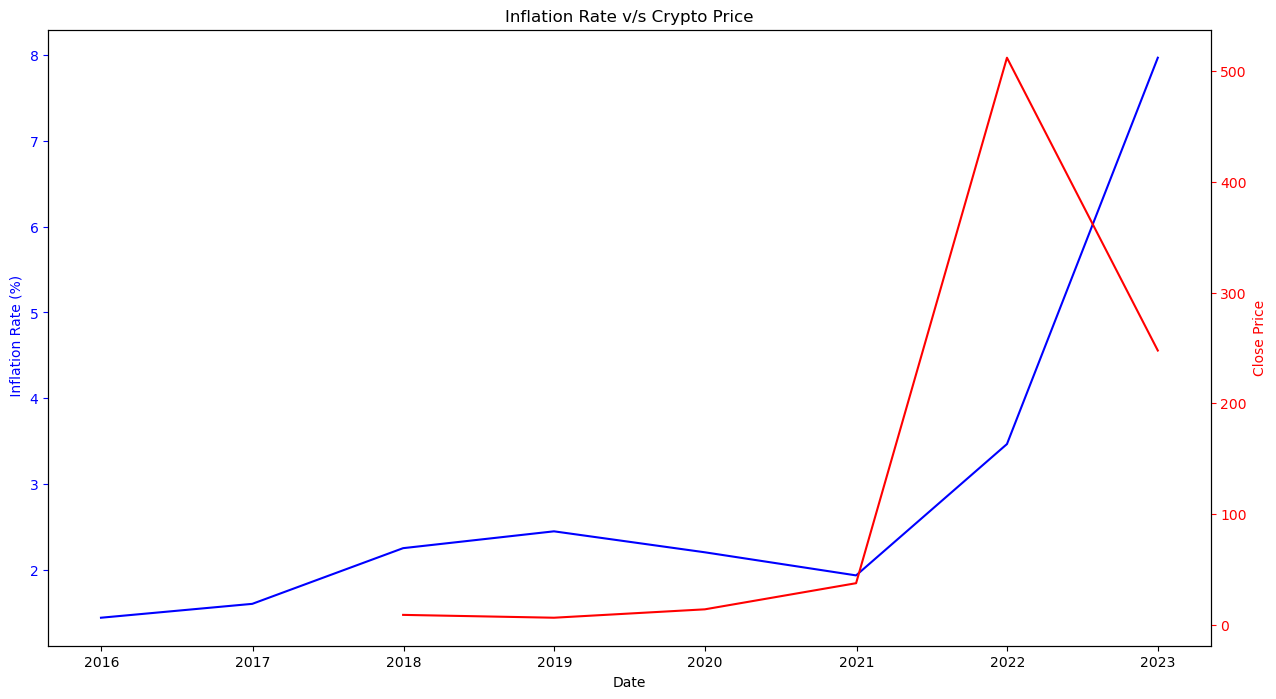

In [65]:
f.plot_inflation_trends(inflation_bnb)

*  We can some trends after 2020, especially in the year 2022, the inflation rate is low and the bitcoin price is high, but then as inflation increases, the price decreases. 
*  Both the inflation rate and crypto price display volatility during this period.
*  Trends are quite evident after 2022, with most of the cryptocurrencies dipping low due to the rise in inflation rate around the world.
*   Inflation is influenced by various economic factors such as supply chain disruptions, energy prices, monetary policy, and geopolitical events.  These factors can also indirectly impact cryptocurrency prices.
*  The graph shows a relationship between inflation and crypto prices, but in combination with other economic factors.
*  Not quite evident in earlier years, seems to have a trend in recent years.


## Federal Interest Rates

In [66]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2018', period_two = '2018-12-31')

In [67]:
fed_btc

,DATE,FEDFUNDS,Date,Open,High,Low,Close,Volume,Market Cap
24,2018-01-01,1.41,2018-01-01,14046.002764,14521.965544,12980.811131,13577.188555,9.527935e+09,2.292229e+11
25,2018-02-01,1.42,2018-02-01,10269.843887,10332.946065,8700.332595,9171.249369,4.557095e+09,1.620348e+11
26,2018-03-01,1.51,2018-03-01,10423.581476,10974.716731,10375.265796,10929.765497,3.441035e+09,1.796653e+11
27,2018-04-01,1.69,2018-04-01,6959.890620,7054.477480,6506.022091,6830.630577,3.598865e+09,1.162929e+11
28,2018-05-01,1.70,2018-05-01,9253.083883,9253.083883,8881.779114,9096.810022,6.156448e+09,1.532087e+11
29,2018-06-01,1.82,2018-06-01,7503.960275,7590.623838,7411.831128,7525.473797,3.534811e+09,1.277794e+11
30,2018-07-01,1.91,2018-07-01,6385.423752,6409.365459,6310.846816,6364.401842,3.508360e+09,1.090069e+11
31,2018-08-01,1.91,2018-08-01,7744.631395,7747.417375,7492.216628,7596.721803,4.823441e+09,1.302081e+11
32,2018-09-01,1.95,2018-09-01,7011.745045,7238.263496,7011.745045,7193.248733,3.736417e+09,1.224339e+11
33,2018-10-01,2.19,2018-10-01,6624.023395,6653.039249,6531.896590,6596.018098,3.103182e+09,1.142173e+11


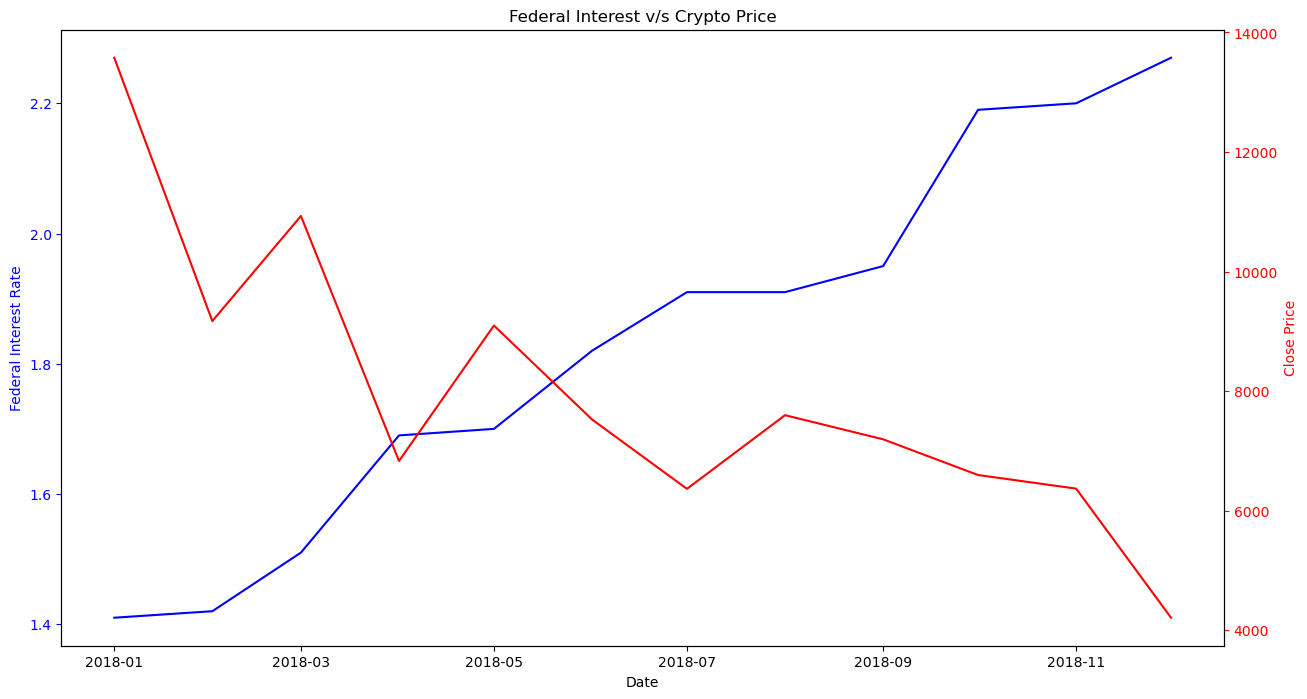

In [68]:
f.plot_federal_interest_trends(fed_btc)

In [69]:
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

Correlation Coefficient: -0.84377208083262


In [70]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2019', period_two = '2019-12-31')

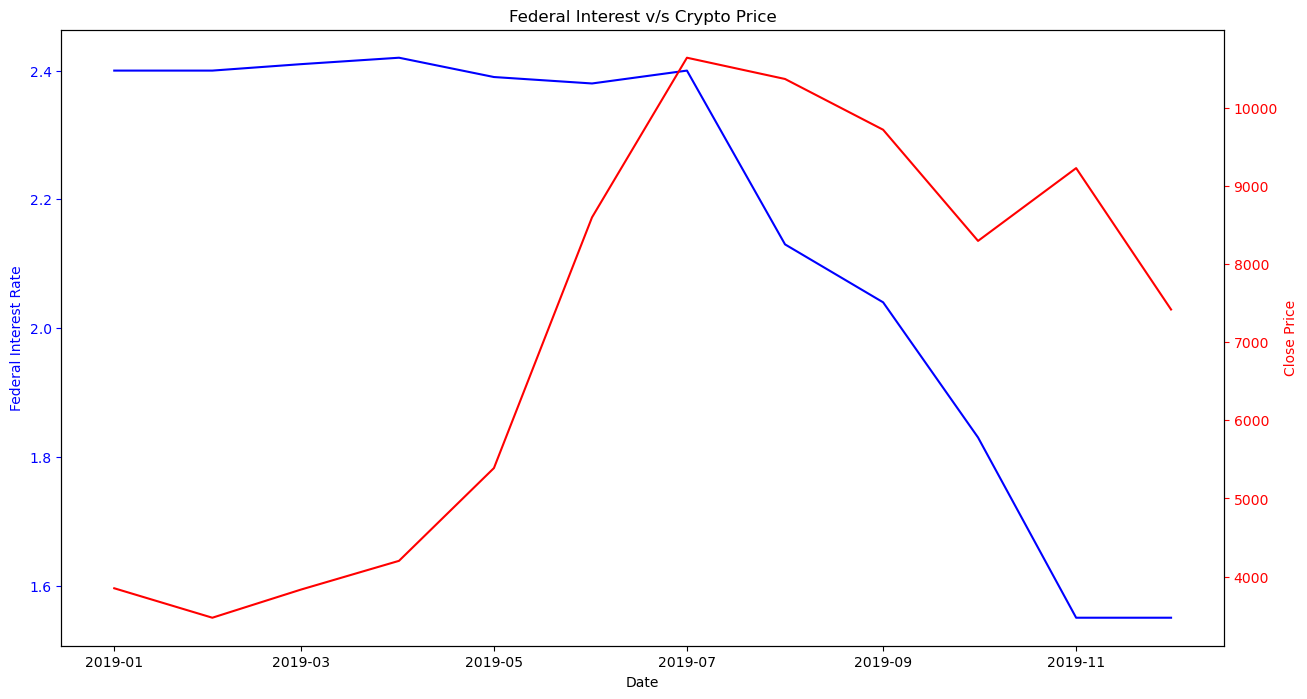

In [71]:
f.plot_federal_interest_trends(fed_btc)

In [72]:
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

Correlation Coefficient: -0.4576541565526137


In [73]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2020', period_two = '2020-12-31')

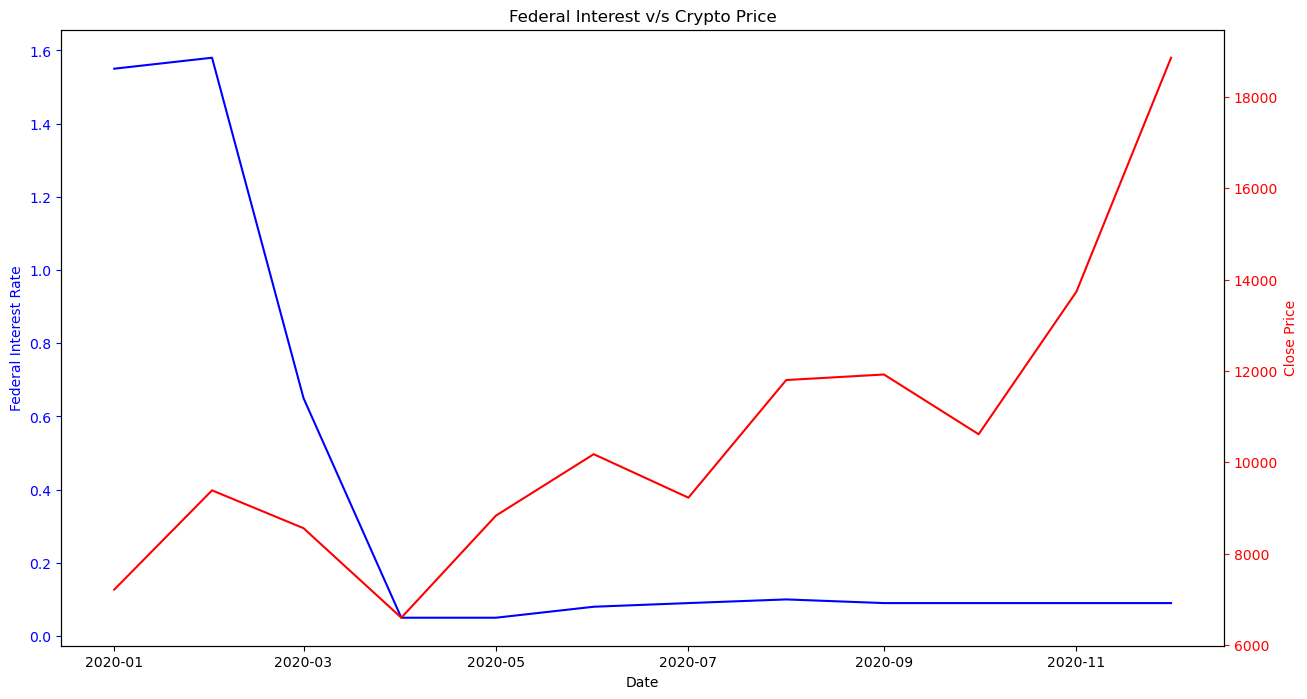

Correlation Coefficient: -0.36056716780464276


In [74]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2020', period_two = '2020-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

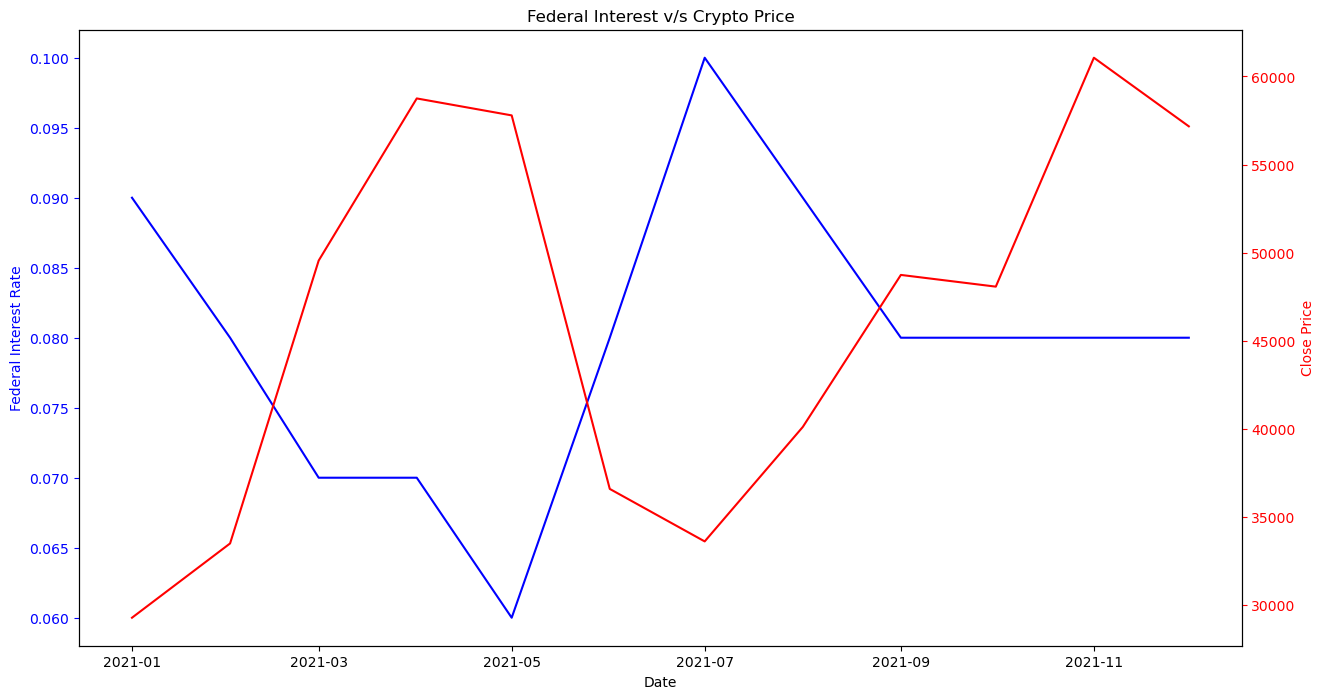

Correlation Coefficient: -0.6757640142201339


In [75]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2021', period_two = '2021-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

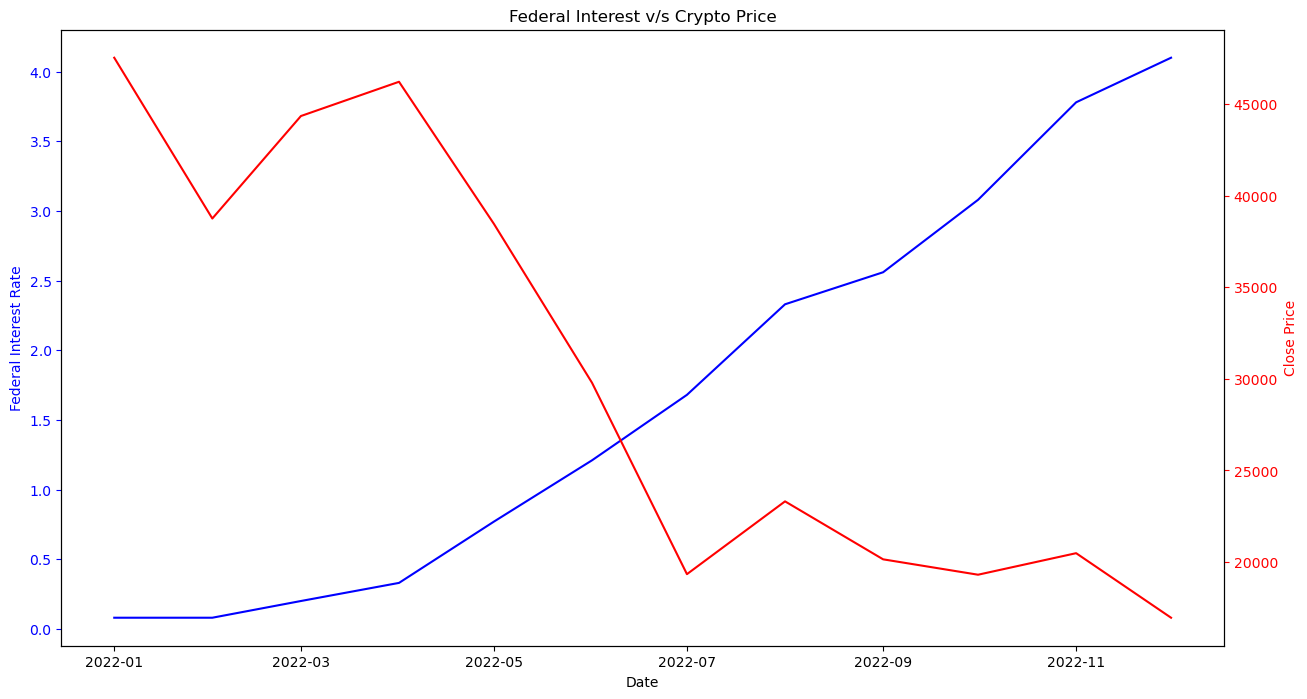

Correlation Coefficient: -0.9000228172941939


In [76]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", bitcoin, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

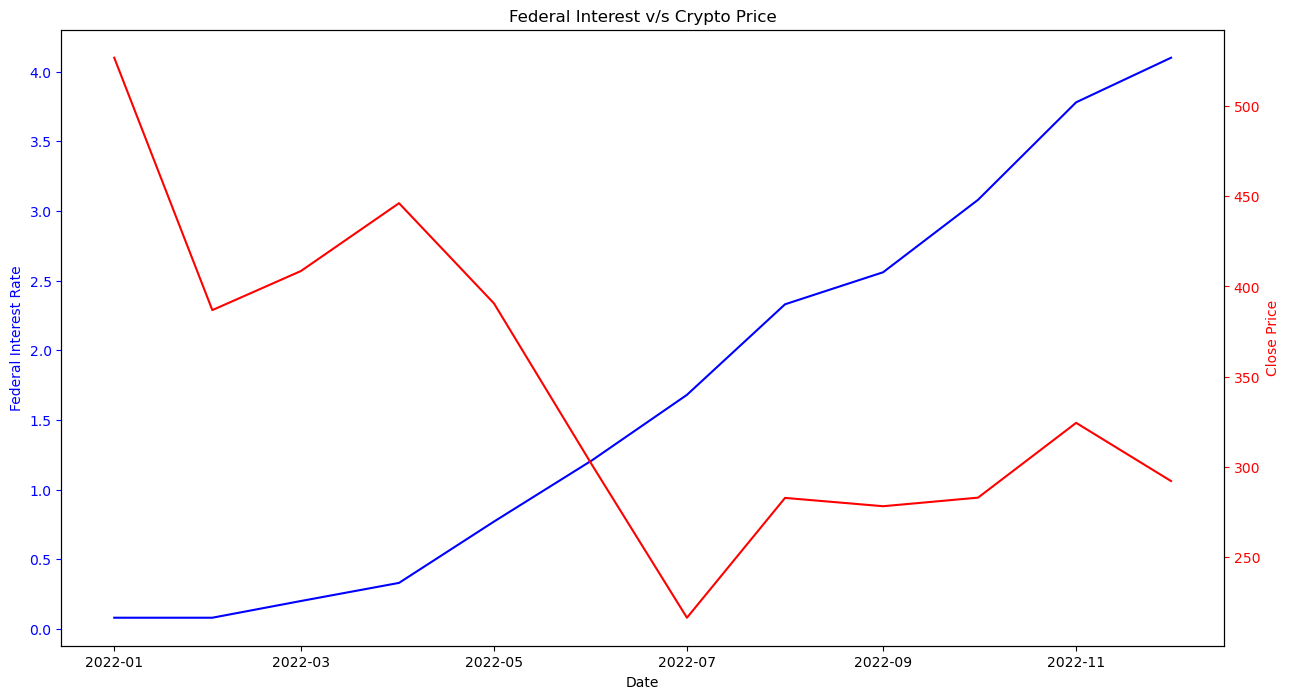

Correlation Coefficient: -0.6823403235874682


In [77]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", binance, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

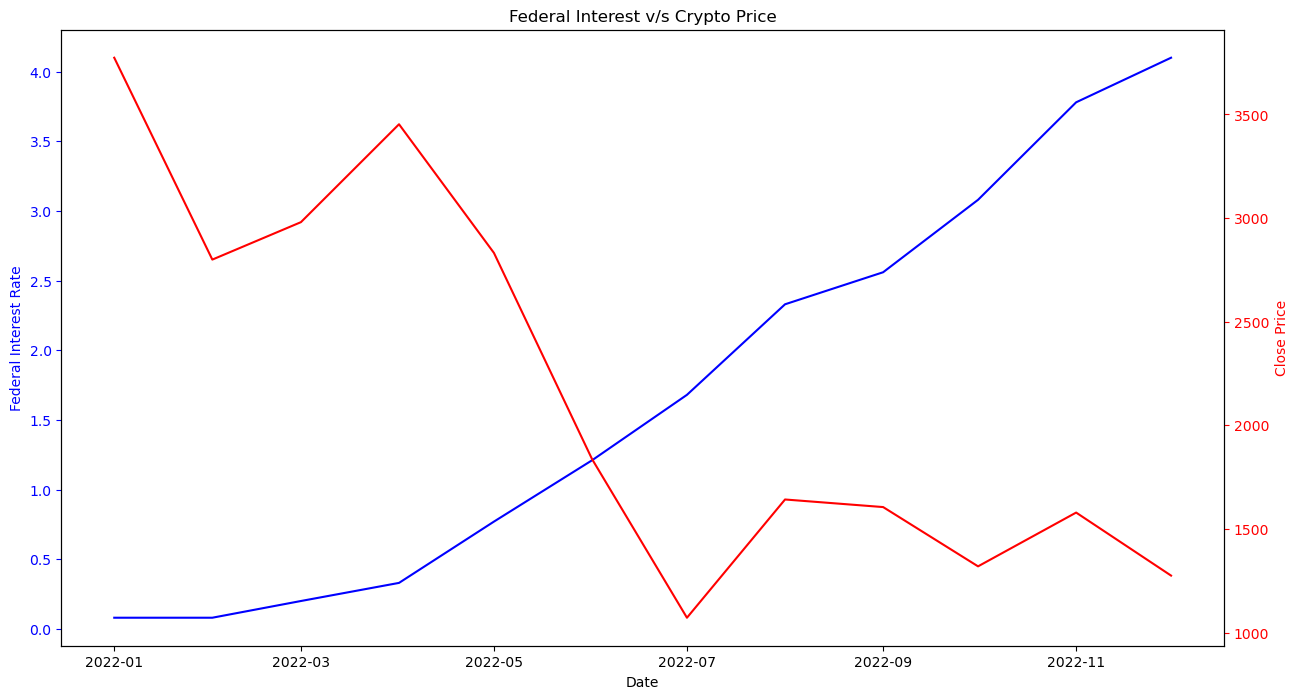

Correlation Coefficient: -0.8274847224106427


In [78]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", ethereum, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

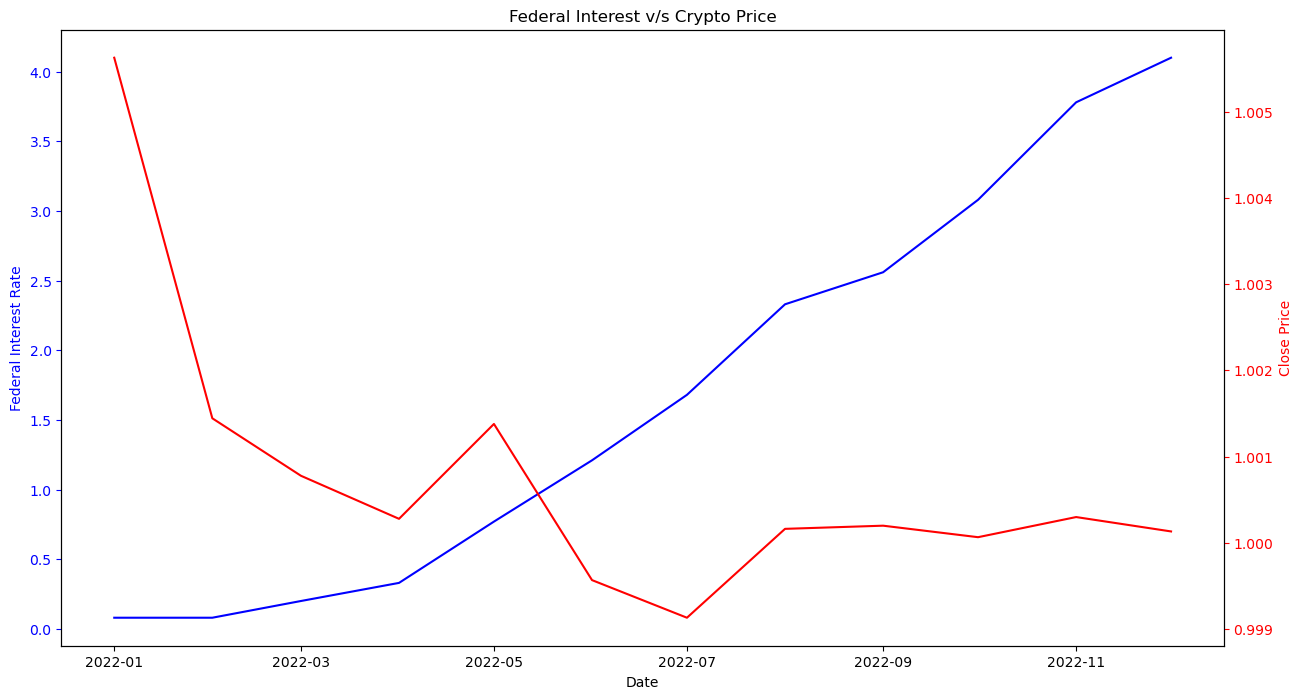

Correlation Coefficient: -0.46891451879457274


In [79]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", usdt, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

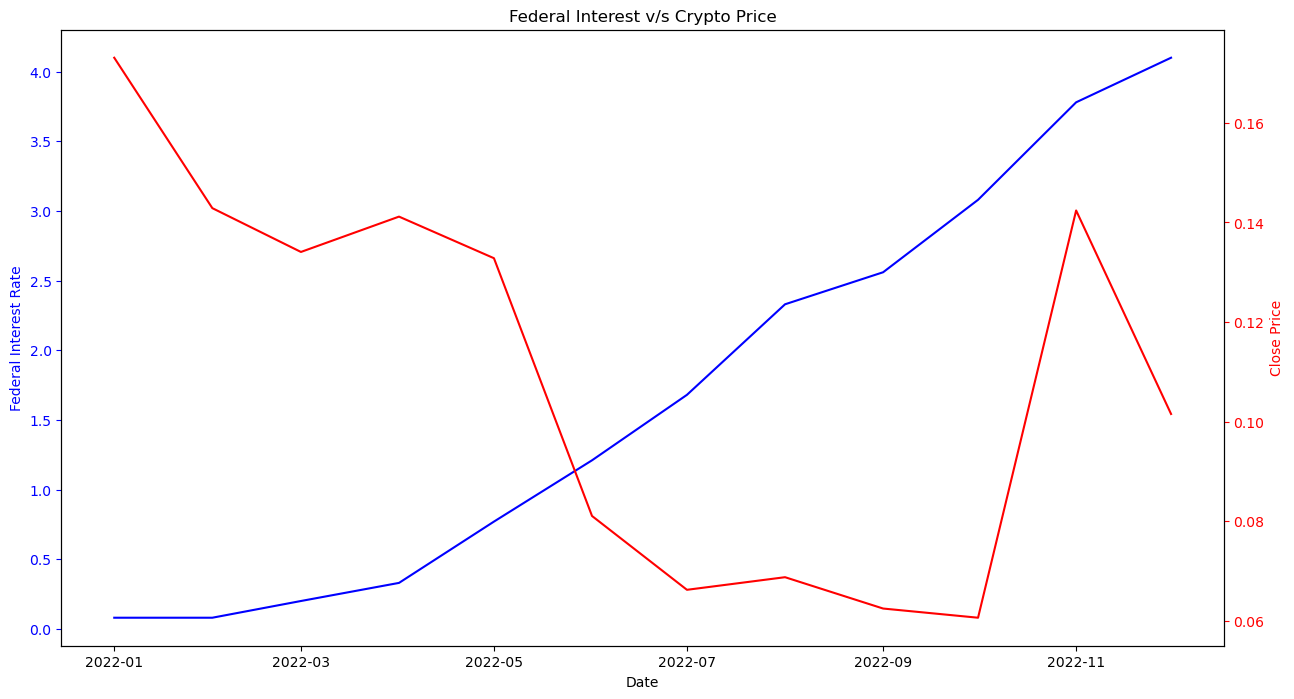

Correlation Coefficient: -0.5127788733573155


In [80]:
fed_btc = f.combine_fed_rates_crypto("FEDFUNDS.csv", doge, period_one = '2022', period_two = '2022-12-31')
f.plot_federal_interest_trends(fed_btc)
correlation = fed_btc['Close'].corr(fed_btc['FEDFUNDS'])
print("Correlation Coefficient: {}".format(correlation))

*  According to our Hypothesis, Federal Interest Rates and Cryptocurrencies have an inverse relation. When the feds increase the
   interest rates, it often impacts the crypto market, causing a sharp decrease in prices.
*  As evident from the plots, they do inhibit an inverse relationship, like in the year 2022, where there was a drastic increase    in federal interest rates to combat inflation, which led to disruption in crypto market.
*  Interest rate changes are often implemented by feds in response to economic conditions and inflation. Broader economic
   factors such as inflation, economic growth, and unemployment can also impact cryptocurrency prices as we’ve seen earlier.
*  So we can say with evidence that Federal Interest Rates do have an influence over cryptocurrencies.

## US DOLLAR

In [81]:
usd_btc = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", bitcoin, period_one="2019", period_two="2019-12-31")

In [82]:
usd_btc

,Date,Price,Open_x,High_x,Low_x,Vol.,Change %,Open_y,High_y,Low_y,Close,Volume,Market Cap
783,2019-01-01,96.17,96.15,96.32,95.65,NaN,0.00%,3747.289082,3857.661350,3720.528270,3851.181614,3.433814e+09,6.561697e+10
784,2019-01-02,96.82,96.14,96.96,95.82,NaN,0.68%,3852.524626,3944.482761,3825.302832,3938.625961,3.910034e+09,6.752997e+10
785,2019-01-03,96.31,96.72,96.75,96.21,NaN,-0.53%,3935.381479,3935.381479,3828.512308,3843.996640,4.077089e+09,6.774767e+10
786,2019-01-04,96.18,96.28,96.61,96.05,NaN,-0.13%,3847.083953,3888.225089,3795.299372,3877.816632,3.521628e+09,6.709019e+10
787,2019-01-07,95.67,96.16,96.16,95.64,NaN,-0.53%,4082.095636,4103.696834,4027.393341,4036.958448,4.366201e+09,7.082522e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,2019-12-25,97.65,97.67,97.73,97.35,NaN,0.00%,7259.115864,7263.235588,7146.059773,7205.380688,1.854142e+10,1.306067e+11
1040,2019-12-26,97.53,97.62,97.71,97.49,NaN,-0.12%,7206.513103,7407.990908,7170.482251,7211.341194,1.726194e+10,1.308025e+11
1041,2019-12-27,96.92,97.54,97.55,96.92,NaN,-0.63%,7209.301104,7260.341054,7111.398497,7246.422425,2.098750e+10,1.303918e+11
1042,2019-12-30,96.74,97.02,97.02,96.61,NaN,-0.19%,7388.393119,7397.633413,7234.181931,7245.988923,2.020573e+10,1.323193e+11


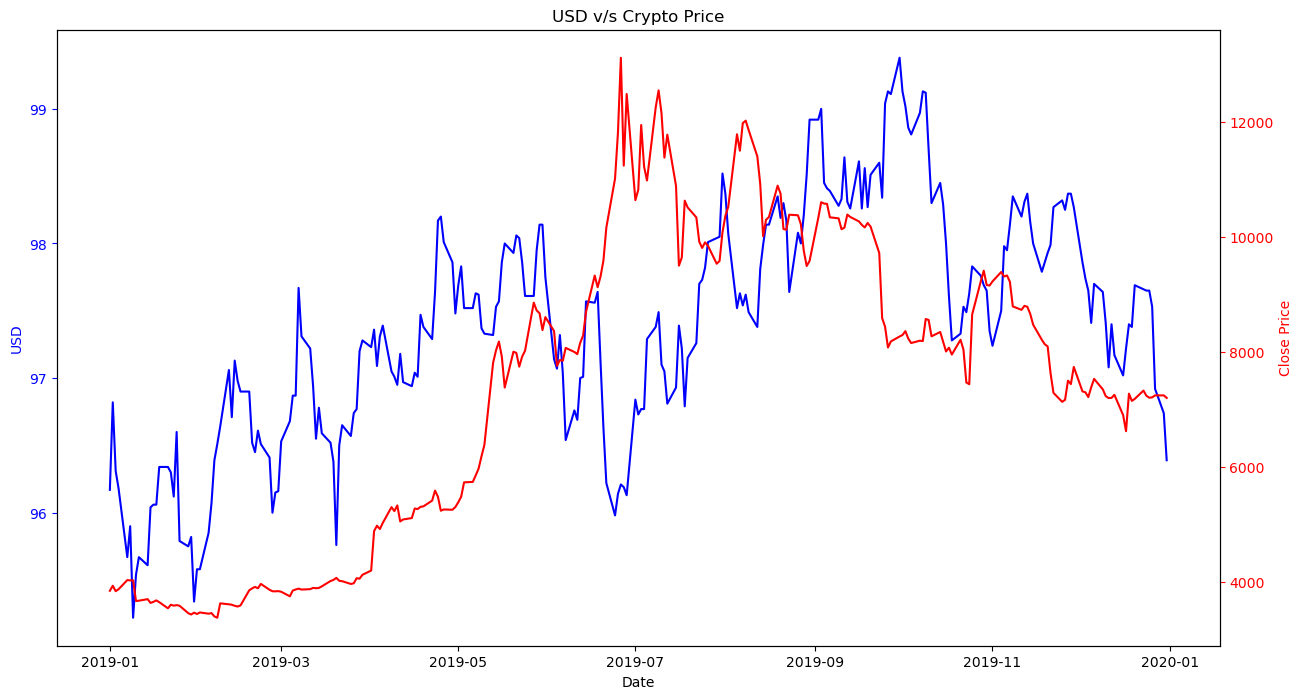

In [83]:
f.plot_usd_trends(usd_btc)

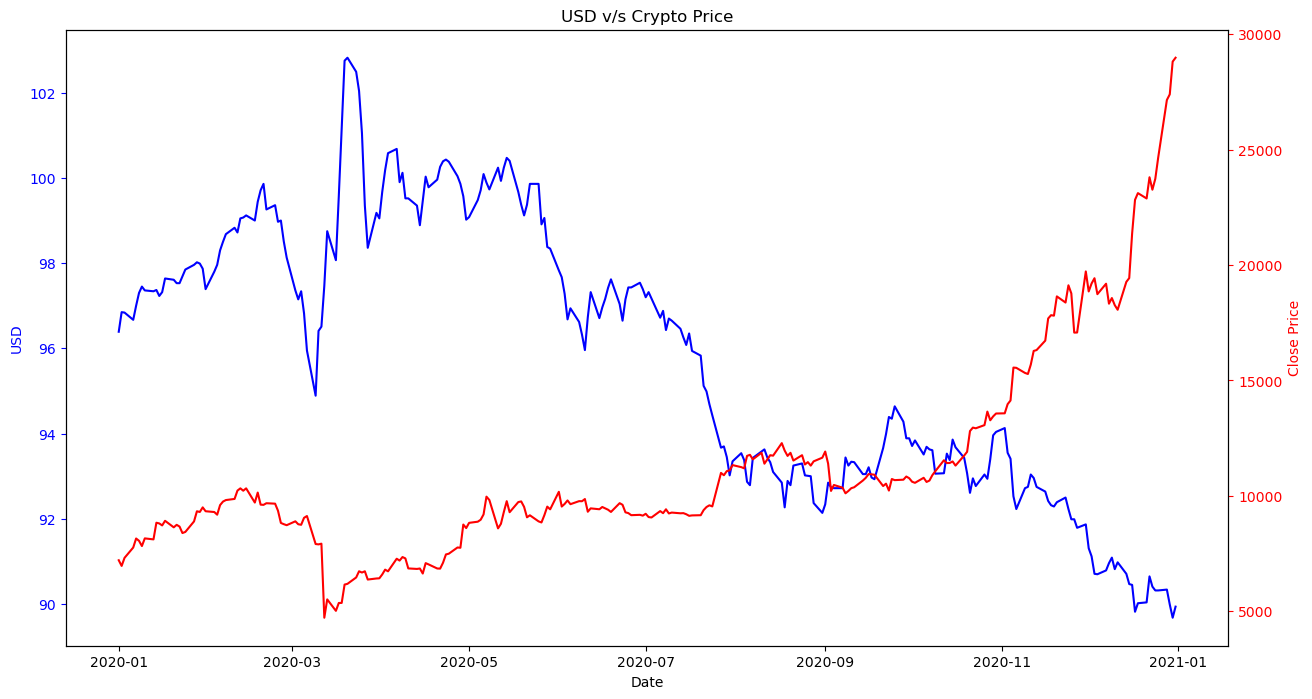

In [84]:
usd_btc = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", bitcoin, period_one="2020", period_two="2020-12-31")
f.plot_usd_trends(usd_btc)

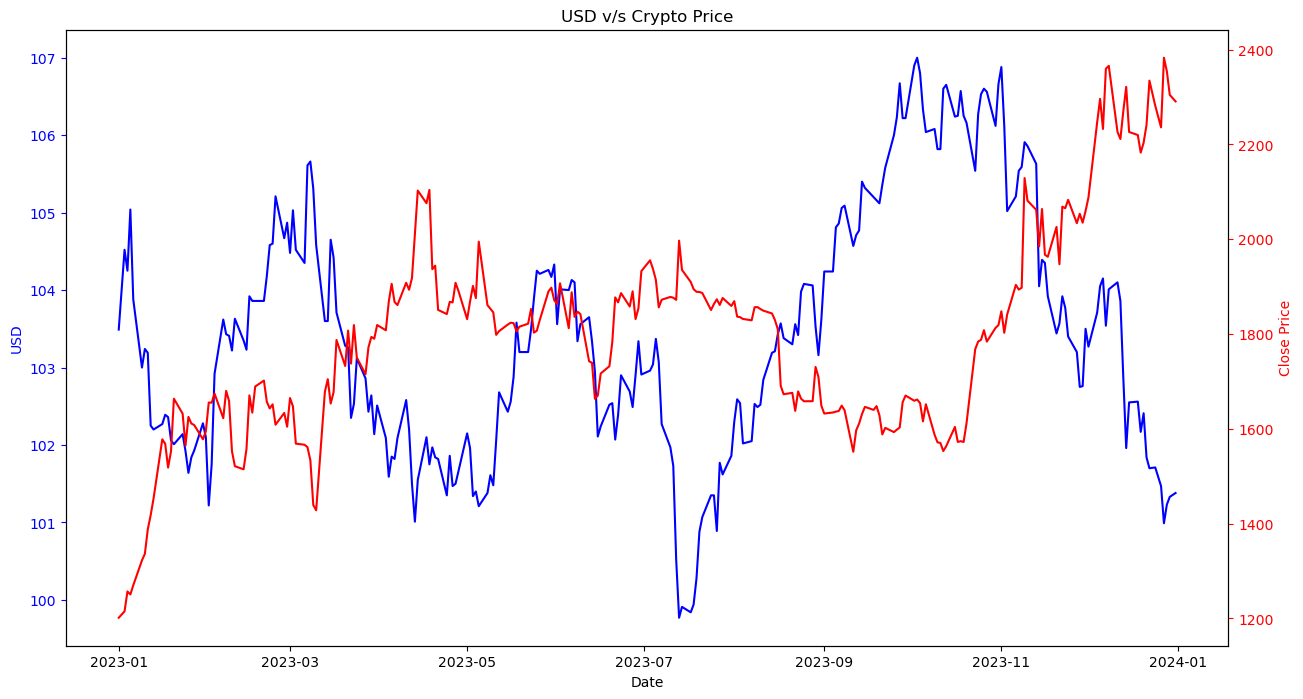

In [85]:
ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_eth = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", ethereum, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_eth)


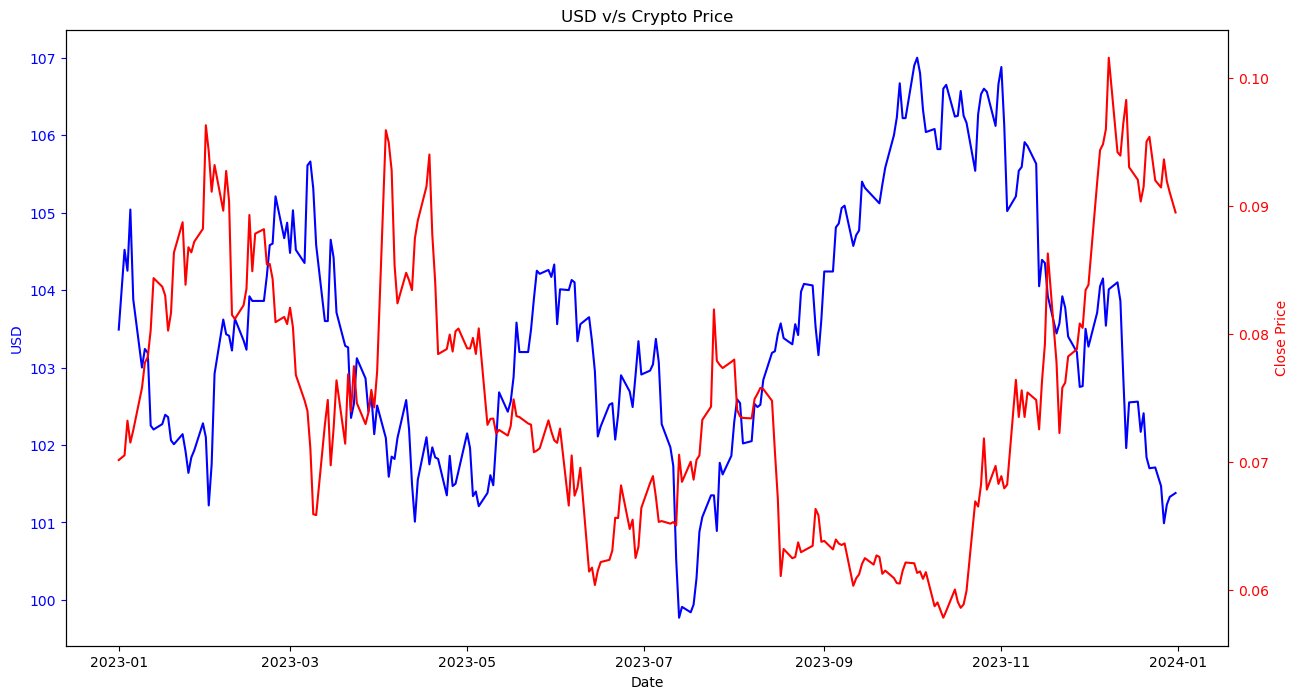

In [86]:
#ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_doge = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", doge, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_doge)


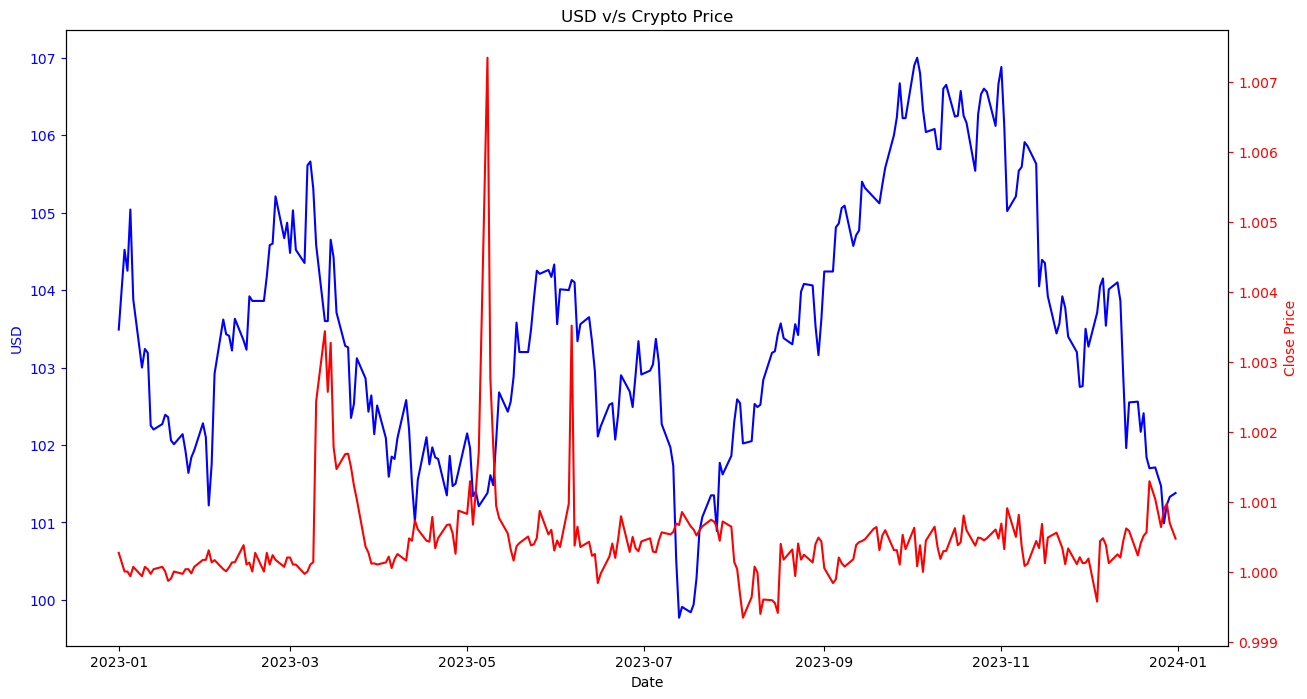

In [87]:
#ethereum = f.crypto_dataset('./cryptodata/ethereum_2016-01-01_2024-04-22.csv')
usd_usdt = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", usdt, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(usd_usdt)


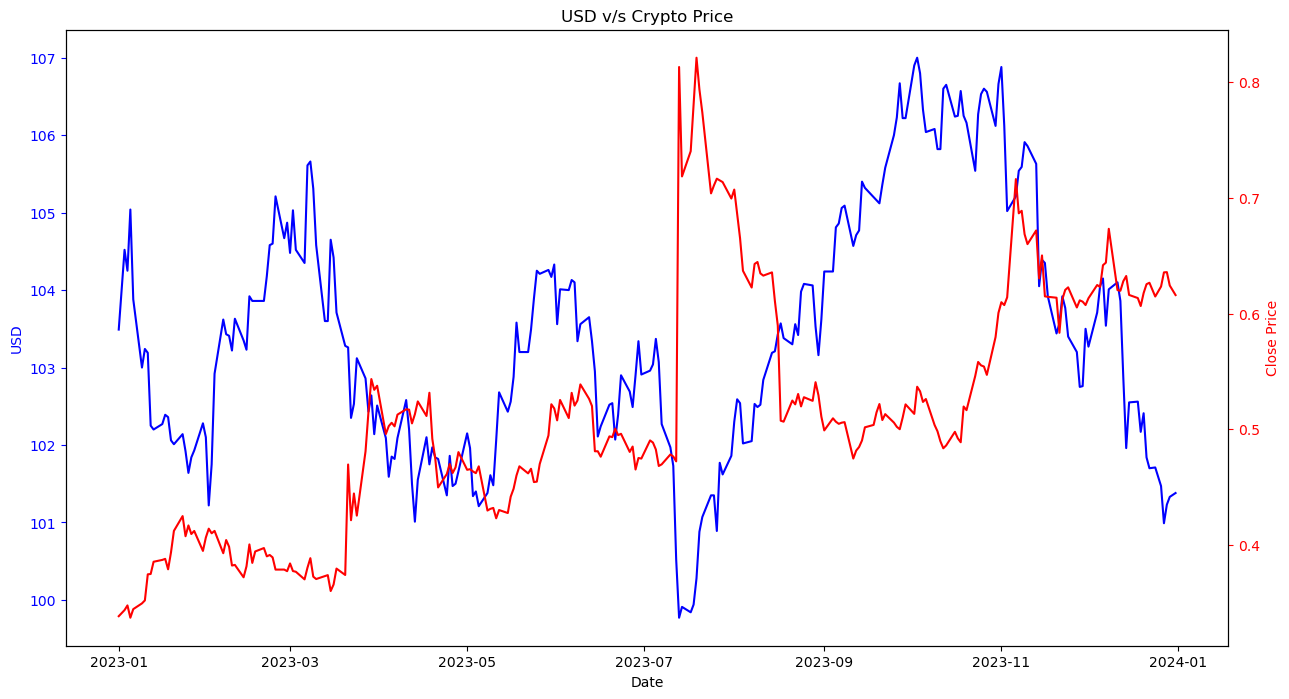

In [88]:

rip_usd = f.combine_usd_crypto(".\\EconomicFactors\\US Dollar Index Historical Data.csv", ripple, period_one="2023", period_two="2023-12-31")
f.plot_usd_trends(rip_usd)


*  In the year 2023, the graph displays a general inverse correlation between the value of the US Dollar (USD) and the crypto price.
*  As the USD strengthens, the crypto price tends to decrease, and vice versa. This aligns with the concept of currency correlation,
   where a stronger USD can make cryptocurrencies appear less attractive, potentially leading to a decrease in demand and price.
*  Some periods where the relationship is consistent, especially in the later half of 2023.
*  USD alone does have a strong influence on cryptocurrencies, but in combination with other economic factors might play a role
   in shaping the cryptocurrency market.

## Conclusion

*  Not one single dominating factor. We cannot say with certainty that any one particular factor has a direct influence over
cryptocurrencies. Maybe Federal Rates can play as an indicator whether crypto prices may go up or down
*  Cryptocurrencies being highly volatile are sensitive towards the market sentiment. People with strong influence can act as a
catalyst to move the cryptocurrency market.
*  Economic factors in combination can play a role in influencing the prices of cryptocurrencies.
*  One observation is that Ethereum has trends very similar to that of Bitcoin. Bitcoin has a direct influence over Ethereum.
*  Invest Wisely! 